## Analysis of Global Emissions from Agricultural and Forest Land.

Various emissions cause what we know as green house effect. The greenhouse effect is a natural process that warms the Earth’s surface. When the Sun’s energy reaches the Earth’s atmosphere, some of it is reflected back to space and the rest is absorbed and re-radiated by greenhouse gases.
The absorbed energy warms the atmosphere and the surface of the Earth. This process maintains the Earth’s temperature at around 33 degrees Celsius warmer than it would otherwise be, allowing life on Earth to exist.

In this article, we’ll be looking at the major causes of these emissions and how the trend has been over the years, we’ll also look at the countries that has generated most of these from 1990–2019.

In [1]:
# import needed libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
# load dataset
data_link = "/content/drive/MyDrive/udacity/Article/FAOSTAT_data_1961_2019.csv"
data = pd.read_csv(data_link)

In [4]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3050,FAO TIER 1,kilotonnes,240.68,245.31,255.83,259.06,265.60,276.99,280.09,288.82,286.38,290.26,287.79,231.53,244.98,262.84,282.07,288.23,280.88,280.29,274.24,275.37,278.21,277.94,262.63,230.15,202.73,160.26,172.94,181.44,179.56,178.47,187.55,189.76,190.83,197.92,211.16,239.72,264.61,283.45,318.34,272.14,225.40,287.89,293.63,285.60,295.40,300.81,304.23,339.56,345.66,401.07,402.51,396.92,393.09,398.29,383.30,380.88,371.29,378.89,389.66
1,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3051,UNFCCC,kilotonnes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,309.03,nan,nan,nan,nan,nan,nan,nan,414.00,nan,nan,nan,nan,nan,nan
2,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3050,FAO TIER 1,kilotonnes,"6,739.13","6,868.70","7,163.20","7,253.82","7,436.74","7,755.83","7,842.63","8,086.99","8,018.70","8,127.28","8,058.12","6,482.76","6,859.41","7,359.41","7,898.07","8,070.30","7,864.53","7,847.98","7,678.58","7,710.36","7,789.88","7,782.32","7,353.64","6,444.20","5,676.44","4,487.39","4,842.32","5,080.21","5,027.74","4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"
3,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3051,UNFCCC,kilotonnes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"8,652.84",nan,nan,nan,nan,nan,nan,nan,"11,592.00",nan,nan,nan,nan,nan,nan
4,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,"6,739.13","6,868.70","7,163.20","7,253.82","7,436.74","7,755.83","7,842.63","8,086.99","8,018.70","8,127.28","8,058.12","6,482.76","6,859.41","7,359.41","7,898.07","8,070.30","7,864.53","7,847.98","7,678.58","7,710.36","7,789.88","7,782.32","7,353.64","6,444.20","5,676.44","4,487.39","4,842.32","5,080.21","5,027.74","4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"


In [5]:
# prints the various categories of countries and continent
data["Area"].value_counts()

World                       176
Non-Annex I countries       176
United States of America    173
Australia                   173
Annex I countries           171
                           ... 
Pitcairn                     47
San Marino                   26
Channel Islands              18
Holy See                     10
Monaco                       10
Name: Area, Length: 281, dtype: int64

In [6]:
# prints the various categories of Emission items
data["Item"].value_counts()

IPCC Agriculture                   2816
Emissions on agricultural land     2180
AFOLU                              2170
Farm-gate emissions                2163
Manure Management                  2057
Agricultural Soils                 1924
Burning - Crop residues            1809
LULUCF                             1664
On-farm energy use                 1590
Savanna fires                      1546
Forest fires                       1423
Manure left on Pasture             1423
Manure applied to Soils            1415
Fires in humid tropical forests    1380
Crop Residues                      1380
Enteric Fermentation               1293
Synthetic Fertilizers              1266
Fires in organic soils              990
Forestland                          658
Net Forest conversion               642
Rice Cultivation                    588
Drained organic soils (N2O)         558
Drained organic soils (CO2)         314
Drained organic soils               185
Name: Item, dtype: int64

In [7]:
# Elements Generated
data["Element"].value_counts()

Emissions (CO2eq) (AR5)             7131
Emissions (CO2eq) from N2O (AR5)    5205
Emissions (N2O)                     5205
Emissions (CH4)                     4372
Emissions (CO2eq) from CH4 (AR5)    4372
Direct emissions (N2O)              2455
Emissions (CO2)                     2428
Indirect emissions (N2O)            2266
Name: Element, dtype: int64

In [8]:

data["Source"].value_counts()

FAO TIER 1    28408
UNFCCC         5026
Name: Source, dtype: int64

In [9]:
data["Unit"].value_counts()

kilotonnes    33434
Name: Unit, dtype: int64

In [10]:
# Give an overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33434 entries, 0 to 33433
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     33434 non-null  int64  
 1   Area          33434 non-null  object 
 2   Item Code     33434 non-null  int64  
 3   Item          33434 non-null  object 
 4   Element Code  33434 non-null  int64  
 5   Element       33434 non-null  object 
 6   Source Code   33434 non-null  int64  
 7   Source        33434 non-null  object 
 8   Unit          33434 non-null  object 
 9   Y1961         9695 non-null   float64
 10  Y1962         9695 non-null   float64
 11  Y1963         9695 non-null   float64
 12  Y1964         9705 non-null   float64
 13  Y1965         9705 non-null   float64
 14  Y1966         9720 non-null   float64
 15  Y1967         9728 non-null   float64
 16  Y1968         9754 non-null   float64
 17  Y1969         9764 non-null   float64
 18  Y1970         9772 non-nul

As can be seen in the dataset there are alot of missing values from the year 1961-1989, this can be due to the fact that accurate method of collecting the data were not very much available during that period.

As a result of this only data ranging from the 1990 to 2019 will be considered for analysis, as they have minimum amount of missing values. Filling them with any statistical value might not be a true representation of the entire dataset.



In [11]:
# Columns to drop
col_to_drop = data.iloc[:, 9:38].columns.values
col_to_drop = list(col_to_drop)

In [12]:
# Drops columns from 1961-1989
data = data.drop(col_to_drop, axis=1)

In [13]:
data

,Area Code,Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3050,FAO TIER 1,kilotonnes,178.47,187.55,189.76,190.83,197.92,211.16,239.72,264.61,283.45,318.34,272.14,225.40,287.89,293.63,285.60,295.40,300.81,304.23,339.56,345.66,401.07,402.51,396.92,393.09,398.29,383.30,380.88,371.29,378.89,389.66
1,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),3051,UNFCCC,kilotonnes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,309.03,nan,nan,nan,nan,nan,nan,nan,414.00,nan,nan,nan,nan,nan,nan
2,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3050,FAO TIER 1,kilotonnes,"4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"
3,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),3051,UNFCCC,kilotonnes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"8,652.84",nan,nan,nan,nan,nan,nan,nan,"11,592.00",nan,nan,nan,nan,nan,nan
4,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,"4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33429,5873,OECD,6996,Farm-gate emissions,7230,Emissions (N2O),3050,FAO TIER 1,kilotonnes,"1,921.34","1,893.78","1,893.36","1,916.06","1,934.33","1,923.60","1,946.36","1,934.40","1,954.38","2,001.24","1,997.66","2,009.15","1,979.10","1,860.77","1,951.80","1,862.73","1,916.82","1,934.83","1,845.80","1,830.85","1,813.48","2,005.89","2,021.56","1,908.27","1,941.63","1,930.95","1,911.31","1,982.24","1,957.05","1,910.05"
33430,5873,OECD,6996,Farm-gate emissions,7273,Emissions (CO2),3050,FAO TIER 1,kilotonnes,"359,718.40","349,587.95","356,097.18","357,877.56","358,412.04","362,301.73","371,213.03","367,808.92","355,755.16","351,113.55","358,475.48","353,580.82","349,150.47","347,196.12","360,187.50","359,998.56","361,867.81","359,852.74","349,170.49","342,303.89","346,755.44","340,465.93","330,927.77","331,061.17","322,571.25","318,291.83","316,627.02","317,711.09","320,458.20","320,730.21"
33431,5873,OECD,6996,Farm-gate emissions,724413,Emissions (CO2eq) from CH4 (AR5),3050,FAO TIER 1,kilotonnes,"853,218.62","840,660.88","837,945.64","839,137.18","843,014.75","837,523.33","826,953.08","824,138.08","819,604.91","828,771.66","832,410.87","833,226.11","823,372.37","773,965.02","795,237.69","772,555.99","791,426.58","786,092.71","766,060.93","764,017.75","749,325.08","798,176.28","794,888.04","749,782.68","763,414.98","759,735.01","748,502.99","773,428.06","773,805.59","754,200.54"
33432,5873,OECD,6996,Farm-gate emissions,724313,Emissions (CO2eq) from N2O (AR5),3050,FAO TIER 1,kilotonnes,"509,153.82","501,852.48","501,740.17","507,755.49","512,597.67","509,752.95","515,785.10","512,616.96","517,910.55","530,328.86","529,378.94","532,425.97","524,462.10","493,104.18","517,227.31","493,623.94","507,957.04","512,729.90","489,136.32","485,173.92","480,571.90","531,560.54","535,713.35","505,690.38","514,533.14","511,702.94","506,498.31","525,293.76","518,619.36","506,162.45"


Missing values from the year 1990-2019, will be replaced with the mean value of the country for that particular year.

In [14]:
# Select numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
cat_columns = data.select_dtypes(include=['object']).columns

In [15]:
# Apply mean inputation to numeric columns
n_data = data[numeric_columns].apply(lambda x: x.fillna(x.mean()),axis=0)

In [16]:
# Concatenates numeric and categorical columns
data = pd.concat([data[cat_columns], n_data], axis=1)

In [17]:
# Check for missing value
data.isnull().sum()

Area            0
Item            0
Element         0
Source          0
Unit            0
Area Code       0
Item Code       0
Element Code    0
Source Code     0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012           0
Y2013           0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
dtype: int64

In [18]:
data

,Area,Item,Element,Source,Unit,Area Code,Item Code,Element Code,Source Code,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Enteric Fermentation,Emissions (CH4),FAO TIER 1,kilotonnes,2,5058,7225,3050,178.47,187.55,189.76,190.83,197.92,211.16,239.72,264.61,283.45,318.34,272.14,225.40,287.89,293.63,285.60,295.40,300.81,304.23,339.56,345.66,401.07,402.51,396.92,393.09,398.29,383.30,380.88,371.29,378.89,389.66
1,Afghanistan,Enteric Fermentation,Emissions (CH4),UNFCCC,kilotonnes,2,5058,7225,3051,"20,307.68","20,191.78","18,315.58","18,031.23","17,935.47","18,121.70","18,273.51","19,353.79","18,693.49","18,507.13","17,918.38","17,878.19","18,935.75","18,519.79","19,475.24",309.03,"19,240.10","18,774.67","18,765.85","19,172.85","18,930.39","18,066.80","18,001.45",414.00,"18,555.20","18,862.42","19,176.80","19,190.95","19,411.53","19,812.60"
2,Afghanistan,Enteric Fermentation,Emissions (CO2eq) from CH4 (AR5),FAO TIER 1,kilotonnes,2,5058,724413,3050,"4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"
3,Afghanistan,Enteric Fermentation,Emissions (CO2eq) from CH4 (AR5),UNFCCC,kilotonnes,2,5058,724413,3051,"20,307.68","20,191.78","18,315.58","18,031.23","17,935.47","18,121.70","18,273.51","19,353.79","18,693.49","18,507.13","17,918.38","17,878.19","18,935.75","18,519.79","19,475.24","8,652.84","19,240.10","18,774.67","18,765.85","19,172.85","18,930.39","18,066.80","18,001.45","11,592.00","18,555.20","18,862.42","19,176.80","19,190.95","19,411.53","19,812.60"
4,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),FAO TIER 1,kilotonnes,2,5058,723113,3050,"4,997.11","5,251.40","5,313.28","5,343.24","5,541.79","5,912.35","6,712.20","7,409.07","7,936.61","8,913.50","7,619.92","6,311.28","8,061.00","8,221.53","7,996.74","8,271.23","8,422.60","8,518.30","9,507.65","9,678.42","11,229.90","11,270.36","11,113.79","11,006.60","11,152.04","10,732.46","10,664.55","10,396.02","10,608.84","10,910.38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33429,OECD,Farm-gate emissions,Emissions (N2O),FAO TIER 1,kilotonnes,5873,6996,7230,3050,"1,921.34","1,893.78","1,893.36","1,916.06","1,934.33","1,923.60","1,946.36","1,934.40","1,954.38","2,001.24","1,997.66","2,009.15","1,979.10","1,860.77","1,951.80","1,862.73","1,916.82","1,934.83","1,845.80","1,830.85","1,813.48","2,005.89","2,021.56","1,908.27","1,941.63","1,930.95","1,911.31","1,982.24","1,957.05","1,910.05"
33430,OECD,Farm-gate emissions,Emissions (CO2),FAO TIER 1,kilotonnes,5873,6996,7273,3050,"359,718.40","349,587.95","356,097.18","357,877.56","358,412.04","362,301.73","371,213.03","367,808.92","355,755.16","351,113.55","358,475.48","353,580.82","349,150.47","347,196.12","360,187.50","359,998.56","361,867.81","359,852.74","349,170.49","342,303.89","346,755.44","340,465.93","330,927.77","331,061.17","322,571.25","318,291.83","316,627.02","317,711.09","320,458.20","320,730.21"
33431,OECD,Farm-gate emissions,Emissions (CO2eq) from CH4 (AR5),FAO TIER 1,kilotonnes,5873,6996,724413,3050,"853,218.62","840,660.88","837,945.64","839,137.18","843,014.75","837,523.33","826,953.08","824,138.08","819,604.91","828,771.66","832,410.87","833,226.11","823,372.37","773,965.02","795,237.69","772,555.99","791,426.58","786,092.71","766,060.93","764,017.75","749,325.08","798,176.28","794,888.04","749,782.68","763,414.98","759,735.01","748,502.99","773,428.06","773,805.59","754,200.54"
33432,OECD,Farm-gate emissions,Emissions (CO2eq) from N2O (AR5),FAO TIER 1,kilotonnes,5873,6996,724

## Questions to ask
1. How has the amount of emitted elements varied over the years?
2. Which country has the highest amount of emission over the years?
3. What element is emitted the most?
4. What item or process produced the most emission over the years?



### How has the amount of emitted elements varied over the years?

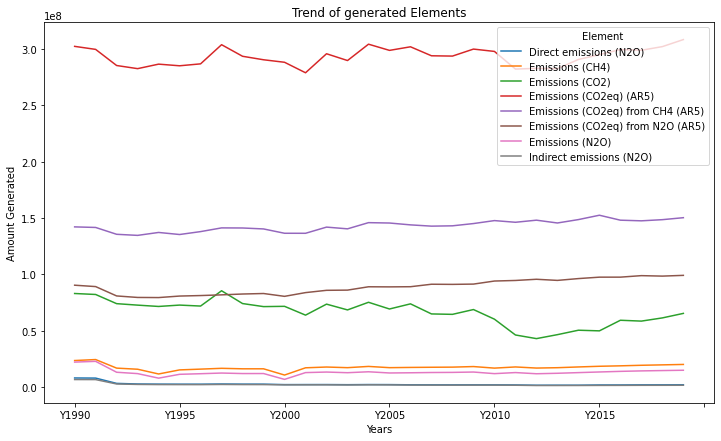

<Figure size 432x288 with 0 Axes>

In [46]:
e_data.iloc[:, :-1].T.plot(kind="line", figsize=(12,7))
plt.title("Trend of generated Elements")
plt.xlabel("Years")
plt.ylabel("Amount Generated")
plt.show()
plt.savefig('a.jpeg')

**Observations**
* Indirect emissions from N20 has had a somewhat constant amount generated over the years
* Emissions (CO2eq) from N2O (AR5) has a linear trend, meaning that the amount generated increases yearly. This is also the same for Emissions (C02eq) from CH4 (AR5).
* There was a dip in the amount of Emissions from CO2 from 2011 till around 2015.

### Which country has the highest amount of emission over the years?

In [19]:
c_data = data.groupby("Area").sum().iloc[:, 4:]

In [20]:
c_data['sum'] = c_data[list(c_data.columns)].sum(axis=1)

In [21]:
c_data

,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,sum
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"463,263.51","464,359.88","427,857.40","423,226.12","511,570.09","520,869.52","444,553.54","475,946.13","472,252.61","480,357.64","449,017.82","444,252.94","489,662.84","485,758.27","502,627.04","205,032.30","501,811.04","493,647.76","508,301.59","521,704.14","539,393.16","522,391.42","519,522.69","342,637.69","533,851.78","527,559.92","537,629.23","536,354.88","536,744.25","551,919.08","14,434,076.30"
Africa,"15,723,683.05","15,823,356.37","15,920,371.64","15,930,391.54","16,036,133.65","16,163,512.15","16,128,322.74","16,363,921.23","17,054,665.97","16,984,773.69","16,813,434.61","16,707,462.79","17,149,036.46","17,714,158.09","17,726,871.34","18,282,426.17","18,126,404.13","18,552,774.74","18,852,218.43","18,684,180.83","19,239,298.89","21,074,470.80","21,239,450.70","21,252,161.13","21,279,428.13","21,585,652.68","22,273,129.42","22,303,709.23","22,237,450.80","22,369,575.32","555,592,426.69"
Albania,"370,397.54","364,388.79","333,335.50","331,163.84","339,527.85","343,815.74","397,596.79","414,983.65","401,391.75","398,894.08","143,557.33","133,799.73","234,354.40","136,970.77","141,382.29","100,513.78","139,463.91","134,338.22","130,772.88","131,162.46","483,530.32","465,402.82","463,656.25","463,877.13","477,434.53","485,413.91","496,748.15","496,493.21","500,063.87","508,037.59","9,962,469.08"
Algeria,"479,309.09","474,259.13","442,364.96","438,555.28","140,359.35","434,816.32","439,020.27","457,788.65","453,685.28","451,744.89","167,198.90","421,381.30","437,689.50","434,260.03","461,503.27","447,398.57","456,492.23","449,785.54","445,110.05","462,095.22","463,606.91","462,306.79","469,600.61","472,140.23","489,425.37","496,818.06","507,234.31","507,405.91","510,264.89","519,234.31","13,292,855.24"
American Samoa,-289.70,-289.70,-289.70,-289.70,-289.70,-289.69,-289.69,-289.69,-289.69,-289.69,-289.69,"89,170.60","94,458.41","92,378.59","97,155.85","95,041.62","95,980.18","93,653.02","93,608.91","95,643.92","94,431.63","90,136.35","89,809.60","89,888.07","92,578.34","94,114.41","95,655.58","95,726.35","96,829.25","98,834.61","1,781,908.67"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,"92,270,811.67","90,004,521.69","89,577,825.64","89,005,001.64","94,545,060.32","89,686,092.17","91,750,495.40","97,592,255.36","93,452,248.40","92,436,047.33","97,116,376.16","87,885,140.83","94,046,395.71","91,725,639.46","97,310,186.19","95,131,686.64","94,584,185.16","91,002,469.22","90,822,597.18","92,991,126.13","93,111,215.85","85,606,451.91","85,496,448.18","86,202,526.86","88,496,204.55","89,798,837.28","88,901,863.80","87,728,711.67","88,734,785.55","90,942,887.14","2,737,956,095.06"
Yemen,"621,530.93","479,590.15","441,520.11","435,048.13","432,543.95","82,680.80","443,443.52","470,032.12","459,726.84","457,895.65","133,362.36","541,443.00","571,037.18","568,125.68","596,251.89","585,958.13","593,993.54","494,730.09","498,036.81","590,913.62","224,775.10","563,601.36","265,702.86","477,389.45","489,367.89","581,496.65","587,555.93","587,024.73","587,637.93","595,434.68","14,457,851.07"
Yugoslav SFR,"224,327.05","208,092.93","2,069,660.59","2,037,528.80","2,026,707.56","2,047,752.51","2,064,906.86","2,186,977.82","2,112,364.17","2,091,305.23","2,024,776.84","2,020,235.28","2,139,739.87","2,092,735.74","2,200,701.82","2,152,920.27","2,174,131.65","2,121,537.97","2,120,540.93","2,166,532.29","2,139,134.54","2,041,548.86","2,034,164.36","2,035,937.84","2,096,738.03","2,131,453.18","2,166,978.42","2,168,577.80","2,193,503.35","2,238,824.27","59,530,336.85"


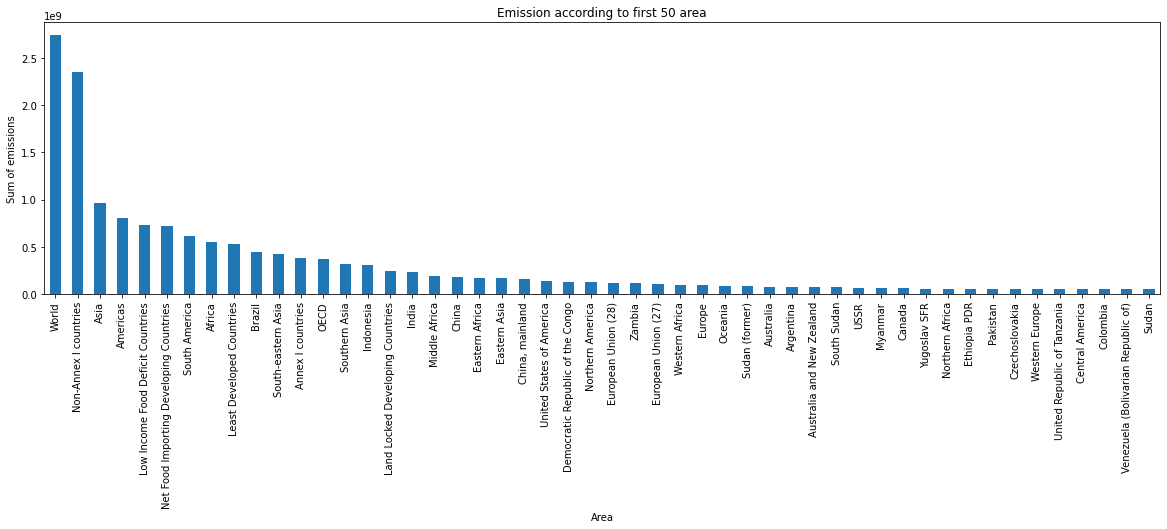

In [22]:
c_data["sum"].sort_values(ascending=False)[:50].plot(kind = "bar", figsize=(20,5))
plt.title("Emission according to first 50 area")
plt.ylabel("Sum of emissions")
plt.show()

As it can be seen from the bar plot above, Brazil, Indonesia, India, china and Zambia are countries that generate most emission from 1990 to 2019.

### What element is emitted the most?

In [23]:
e_data = data.groupby("Element").sum().iloc[:, 4:]

In [24]:
e_data['sum'] = e_data[list(e_data.columns)].sum(axis=1)

In [25]:
e_data

,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,sum
Element,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Direct emissions (N2O),"8,125,220.40","8,018,147.24","3,314,386.22","2,777,744.44","2,657,854.85","2,614,984.57","2,603,466.21","2,766,431.32","2,659,620.39","2,636,803.97","2,233,546.72","2,265,935.47","2,279,713.01","2,161,443.58","2,288,428.23","2,244,005.67","2,055,020.97","2,013,559.52","1,995,607.49","2,017,186.32","1,996,670.75","1,917,120.38","1,660,530.15","1,701,734.36","1,693,334.43","1,888,544.82","1,900,919.84","2,000,633.13","2,021,355.31","2,060,786.71","78,570,736.43"
Emissions (CH4),"23,604,928.67","24,474,226.97","16,872,578.27","15,886,365.73","11,665,785.63","15,287,873.48","15,978,682.79","16,693,505.45","16,257,090.16","16,257,881.44","10,717,824.32","17,151,591.51","17,836,239.08","17,268,945.60","18,378,983.07","17,272,853.17","17,481,490.45","17,631,504.50","17,744,558.49","18,256,485.02","16,870,860.38","17,909,146.37","16,922,841.68","17,243,564.82","17,907,728.51","18,509,016.30","18,902,462.23","19,391,897.04","19,759,316.48","20,139,573.23","526,275,800.84"
Emissions (CO2),"83,106,383.52","82,240,571.68","74,090,799.40","72,783,867.97","71,607,869.70","72,824,064.67","71,963,805.45","85,541,014.29","74,178,057.96","71,468,734.47","71,722,155.86","63,901,954.38","73,667,506.67","68,534,856.05","75,312,828.16","69,352,333.16","73,920,021.06","64,973,937.42","64,598,579.75","68,866,641.23","60,312,695.71","46,289,573.05","43,058,332.68","46,577,687.32","50,513,182.94","49,947,523.20","59,357,275.14","58,600,989.96","61,444,937.40","65,452,690.16","1,996,210,870.43"
Emissions (CO2eq) (AR5),"302,481,277.92","299,805,033.20","285,485,220.97","282,704,278.28","286,699,536.24","285,243,339.46","286,954,612.89","303,965,975.55","293,679,974.33","290,586,587.99","288,359,410.28","279,048,422.24","295,931,865.98","289,894,880.99","304,416,533.69","298,919,485.97","302,102,553.11","294,121,216.10","293,855,892.15","300,070,540.99","297,994,084.59","282,319,625.58","282,970,244.17","282,685,475.87","290,851,108.38","295,131,554.24","299,640,526.87","299,041,080.59","302,257,310.38","308,508,187.44","8,805,725,836.47"
Emissions (CO2eq) from CH4 (AR5),"142,239,278.93","141,735,713.14","135,663,613.50","134,699,143.91","137,297,292.25","135,467,403.46","138,050,833.36","141,345,566.35","141,260,083.52","140,414,468.75","136,575,965.37","136,554,270.02","142,040,264.76","140,507,012.48","146,003,707.94","145,669,510.82","144,025,723.49","142,896,148.56","143,186,447.75","145,191,006.68","147,822,482.03","146,334,996.86","148,193,254.58","145,700,938.97","148,719,084.55","152,585,629.71","148,187,569.56","147,620,273.64","148,646,845.97","150,399,189.25","4,295,033,720.16"
Emissions (CO2eq) from N2O (AR5),"90,475,610.59","89,247,474.83","80,941,816.63","79,606,791.42","79,494,914.94","80,835,915.73","81,283,402.99","81,901,244.73","82,650,202.35","83,097,493.78","80,585,781.80","83,897,184.89","85,930,407.72","86,109,793.89","89,074,559.42","88,989,163.48","89,132,593.56","91,329,373.47","91,203,098.59","91,456,551.11","94,175,577.58","94,676,479.10","95,741,960.10","94,741,119.92","96,347,684.16","97,610,803.03","97,627,154.05","98,958,293.58","98,545,329.99","99,212,238.12","2,674,880,015.56"
Emissions (N2O),"22,211,177.83","22,886,358.08","13,205,691.63","11,994,437.06","7,965,260.21","11,371,726.26","11,903,031.58","12,494,497.08","12,044,343.99","12,058,127.71","6,873,177.92","12,890,963.91","13,378,358.09","12,797,074.59","13,626,326.37","12,559,247.56","12,737,721.22","12,969,720.68","13,075,481.10","13,390,761.74","11,972,498.13","12,920,311.72","11,874,613.16","12,293,704.94","12,878,045.84","13,447,044.74","13,989,866.42","14,406,432.44","14,701,536.84","14,980,387.11","395,897,925.95"
Indirect emissions (N2O),"6,723,044.47","6,684,591.66","2,789,011.01","2,403,460.04","2,265,827.76","

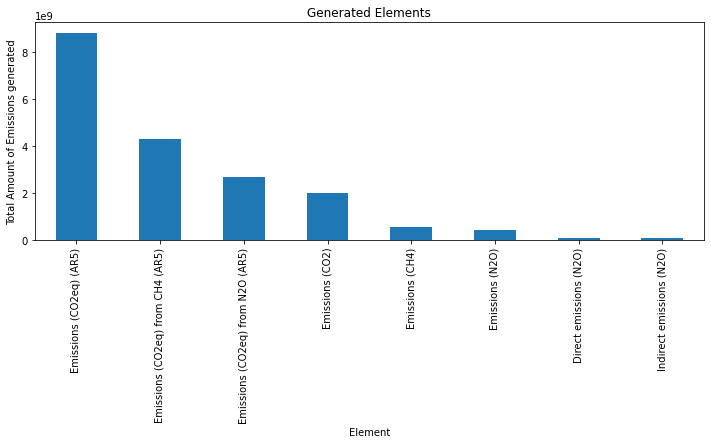

In [48]:
e_data["sum"].sort_values(ascending=False).plot(kind = "bar", figsize=(12,4))
plt.title("Generated Elements")
plt.xlabel("Element")
plt.ylabel("Total Amount of Emissions generated")
plt.show()

The element that was generated the most is the CO2eq (AR5) while the least generated element is the Indirect emission from N2O.

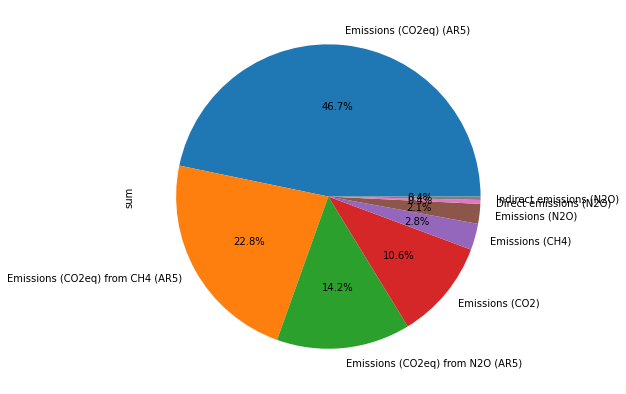

In [41]:
e_data["sum"].sort_values(ascending=False).plot(kind = "pie", figsize=(7,7), autopct='%1.1f%%')

### What item or process produced the most emission over the years?

In [28]:
item_data = data.groupby("Item").sum().iloc[:, 4:]

In [29]:
item_data

,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFOLU,"95,171,498.69","94,672,015.97","91,327,561.12","90,776,017.96","91,331,530.16","92,143,697.15","89,945,658.57","99,386,337.60","93,743,767.66","92,053,580.13","89,917,454.28","86,726,564.06","93,738,485.47","90,762,093.47","95,867,824.70","93,694,957.00","97,770,923.29","93,616,634.02","93,307,368.03","97,098,664.95","94,634,196.48","84,582,764.06","85,211,281.90","84,053,500.60","87,907,676.54","89,509,268.95","97,473,266.49","97,871,917.90","99,617,927.12","102,364,283.14"
Agricultural Soils,"33,839,596.85","33,183,003.20","30,014,922.11","29,354,548.75","28,438,358.57","29,250,067.87","30,236,809.06","30,782,811.54","30,394,412.00","30,640,672.54","29,319,011.49","29,908,911.79","30,521,169.13","30,609,979.37","31,762,055.36","31,434,616.07","31,592,743.37","32,468,897.43","32,680,867.49","33,055,770.60","34,191,631.23","33,573,305.83","34,337,204.38","34,263,290.88","35,206,329.54","35,540,641.75","34,956,942.61","35,440,453.04","35,592,474.10","36,034,362.71"
Burning - Crop residues,"11,175,883.39","13,015,727.35","9,875,295.22","9,430,719.41","5,821,858.20","9,032,250.66","9,628,041.13","10,078,142.72","9,651,807.92","9,676,707.70","5,273,364.29","9,124,391.95","9,542,676.81","9,388,780.00","9,731,722.35","8,730,974.29","9,614,830.50","9,942,068.75","9,896,144.53","10,095,274.36","8,942,820.05","9,933,061.90","9,218,853.88","9,635,197.77","10,241,049.45","10,297,515.39","10,748,121.64","10,815,272.12","11,124,044.24","11,342,621.82"
Crop Residues,"6,823,922.03","6,851,695.19","4,118,531.03","3,771,437.74","3,656,998.21","3,648,402.69","3,761,310.69","3,873,717.57","3,787,725.07","3,794,997.96","3,484,220.08","3,532,368.39","3,569,532.83","3,535,663.09","3,756,711.74","3,829,664.76","3,637,409.21","3,621,983.04","3,785,475.88","3,793,111.17","3,769,691.26","3,815,093.34","3,673,778.23","3,852,002.74","3,955,423.62","4,050,233.77","4,143,222.46","4,201,667.36","4,163,513.45","4,236,361.26"
Drained organic soils,"5,079,069.25","5,056,756.19","4,770,982.80","4,738,276.53","4,738,291.32","4,778,186.94","4,775,053.58","4,796,981.80","4,807,520.19","4,840,946.83","5,066,053.54","5,064,362.17","5,087,064.92","5,095,778.58","5,126,323.47","5,158,665.28","5,183,031.43","5,229,051.75","5,264,046.39","5,293,139.15","5,337,830.31","5,370,855.33","5,427,460.44","5,449,041.60","5,476,518.81","5,512,827.29","5,514,365.02","5,203,377.23","5,228,294.38","5,232,569.37"
Drained organic soils (CO2),"8,473,468.26","8,468,063.80","8,068,570.66","8,003,351.79","8,002,374.91","8,075,805.88","8,072,724.60","8,115,269.55","8,139,294.81","8,196,894.22","9,720,011.13","9,713,576.99","9,759,905.37","9,783,569.22","9,859,546.47","9,946,821.25","10,012,026.37","10,124,487.37","10,207,866.58","10,286,973.29","10,407,857.38","10,508,223.86","10,637,189.18","10,730,712.83","10,782,520.17","10,892,374.15","10,922,109.40","8,866,891.99","8,909,826.78","8,917,806.18"
Drained organic soils (N2O),"3,318,333.46","3,196,253.85","2,263,664.07","2,143,935.00","2,141,012.44","2,152,250.96","2,152,882.40","2,186,608.32","2,161,875.49","2,164,152.18","2,038,869.72","2,035,985.77","2,064,842.60","2,051,030.74","2,078,598.00","2,070,174.01","2,022,028.03","2,017,138.51","2,021,527.62","2,034,368.54","2,034,709.48","2,019,785.97","2,080,310.02","2,081,535.67","2,099,273.85","2,209,484.30","2,108,817.25","2,225,423.83","2,239,099.19","2,251,965.45"
Emissions on agricultural land,"143,458,033.80","142,771,472.45","137,938,599.44","137,301,141.33","137,901,285.90","138,950,995.06","136,710,053.77","146,029,518.05","139,631,357.62","137,939,212.58","136,153,071.06","129,801,540.72","136,363,565.65","133,370,778.02","138,885,583.28","137,024,107.66","141,055,700.03","136,433,708.08","136,197,111.27","139,700,997.39","137,261,377.45","137,798,895.39","138,1

In [30]:
item_data['sum'] = item_data[list(item_data.columns)].sum(axis=1)

Text(0, 0.5, 'Total Amount of Emissions generated')

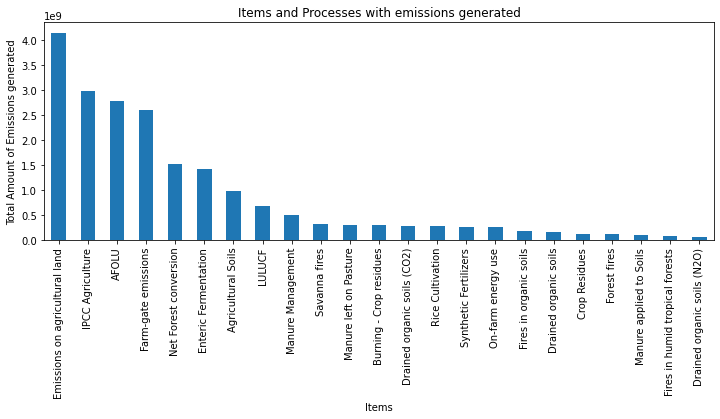

In [49]:
item_data["sum"].sort_values(ascending=False)[:-1].plot(kind = "bar", figsize=(12,4))
plt.title("Items and Processes with emissions generated")
plt.xlabel("Items")
plt.ylabel("Total Amount of Emissions generated")

Emissions on Agricultural land and IPCC Agriculture contribute the most to the total amount of emissions generated over the years.

## CONCLUSION
In this article, we looked at what how the total amount of various emitted elements has varied over the years, we also looked at the counries that had generated the most emissions and the elements that was emitted the most over the years.

1. We saw that the amounted generated for Emissions (CO2eq) from N2O (AR5) will increase yearly and that of Indirect emissions from N20 will remain constant.
2. The element generated the most is Indirect emissions from N20.
3. Emissions from agricultural land contributed the most to the total amount of emissions generated over the years

## References
Dataset: https://www.kaggle.com/ankitpranay/global-emissions-from-agriculture-and-forest-land

https://www.kaggle.com/ankitpranay/global-emissions-from-agriculture-and-forest-land